In [1]:
#For the import of packages
import os
import numpy as np
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import qiime2 as q2
from scipy import stats
import seaborn as sns

data_dir = "data/"

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [2]:
#data import
! wget -nv -O $data_dir/sequences_demux_paired.qza 'https://polybox.ethz.ch/index.php/s/KEQxsekRow6lOAz/download'
! wget -nv -O $data_dir/metadata.tsv 'https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download'

2022-10-26 09:43:43 URL:https://polybox.ethz.ch/index.php/s/KEQxsekRow6lOAz/download [8529260946/8529260946] -> "data//sequences_demux_paired.qza" [1]
2022-10-26 09:43:45 URL:https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download [325995/325995] -> "data//metadata.tsv" [1]


In [2]:
meta = pd.read_csv('data/metadata.tsv', sep='\t')
meta.head()

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0


### 1. Overview over the Dataframe 

In [5]:
meta.shape

(1669, 26)

In [5]:
#How many different host IDs are there?
meta['host_id'].nunique()
#There are 80 unique hosts -> 40 twin pairs 

80

In [6]:
#How many samples of a single host are there?
meta['host_id'].value_counts()

14.1    30
16.2    29
12.2    28
3.2     28
8.2     28
        ..
48.1     8
46.1     7
11.1     7
46.2     6
11.2     6
Name: host_id, Length: 80, dtype: int64

In [7]:
#What different host IDs are there?
hosts = meta['host_id'].unique()
print(sorted(hosts))

[2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, 6.1, 6.2, 8.1, 8.2, 10.1, 10.2, 11.1, 11.2, 12.1, 12.2, 13.1, 13.2, 14.1, 14.2, 15.1, 15.2, 16.1, 16.2, 17.1, 17.2, 18.1, 18.2, 19.1, 19.2, 20.1, 20.2, 21.1, 21.2, 23.1, 23.2, 24.1, 24.2, 25.1, 25.2, 26.1, 26.2, 27.1, 27.2, 28.1, 28.2, 29.1, 29.2, 30.1, 30.2, 32.1, 32.2, 33.1, 33.2, 35.1, 35.2, 36.1, 36.2, 37.1, 37.2, 39.1, 39.2, 40.1, 40.2, 42.1, 42.2, 43.1, 43.2, 44.1, 44.2, 45.1, 45.2, 46.1, 46.2, 47.1, 47.2, 48.1, 48.2]


In [27]:
#list collection dates by host_id & sample ID (id)
meta_id = meta[['id', 'collection_date', 'host_id']]
meta_id_date = meta_id.groupby(['host_id', 'collection_date', 'id']).count()
meta_id_date

Empty DataFrame
Columns: []
Index: [(2.1, 2010-03-01 00:00:00, ERR1310001), (2.1, 2010-04-02 00:00:00, ERR1311587), (2.1, 2010-04-24 00:00:00, ERR1310002), (2.1, 2010-06-13 00:00:00, ERR1310003), (2.1, 2010-06-25 00:00:00, ERR1311588), (2.1, 2010-08-13 00:00:00, ERR1310657), (2.1, 2010-08-29 00:00:00, ERR1310004), (2.1, 2010-09-30 00:00:00, ERR1311589), (2.1, 2010-10-23 00:00:00, ERR1310658), (2.1, 2010-11-20 00:00:00, ERR1310005), (2.1, 2011-02-23 00:00:00, ERR1310659), (2.1, 2011-03-21 00:00:00, ERR1310006), (2.1, 2011-04-21 00:00:00, ERR1310007), (2.1, 2011-05-20 00:00:00, ERR1311590), (2.1, 2011-07-10 00:00:00, ERR1309847), (2.1, 2011-09-17 00:00:00, ERR1310524), (2.1, 2011-10-21 00:00:00, ERR1311591), (2.1, 2011-11-07 00:00:00, ERR1311592), (2.1, 2011-12-07 00:00:00, ERR1311593), (2.1, 2012-05-03 00:00:00, ERR1310525), (2.1, 2012-07-08 00:00:00, ERR1309848), (2.1, 2012-09-09 00:00:00, ERR1311585), (2.1, 2012-11-02 00:00:00, ERR1311586), (2.2, 2010-03-01 00:00:00, ERR1311594), (2.2, 2010-04-08 00:00:00, ERR1310008), (2.2, 2010-04-24 00:00:00, ERR1310009), (2.2, 2010-06-13 00:00:00, ERR1310010), (2.2, 2010-06-25 00:00:00, ERR1310661), (2.2, 2010-07-28 00:00:00, ERR1310662), (2.2, 2010-08-29 00:00:00, ERR1310011), (2.2, 2010-10-01 00:00:00, ERR1310012), (2.2, 2010-10-23 00:00:00, ERR1311596), (2.2, 2010-11-22 00:00:00, ERR1310013), (2.2, 2011-01-11 00:00:00, ERR1310014), (2.2, 2011-02-22 00:00:00, ERR1310016), (2.2, 2011-03-22 00:00:00, ERR1310663), (2.2, 2011-05-04 00:00:00, ERR1310664), (2.2, 2011-05-20 00:00:00, ERR1311597), (2.2, 2011-07-10 00:00:00, ERR1309849), (2.2, 2011-07-26 00:00:00, ERR1309850), (2.2, 2011-08-12 00:00:00, ERR1311598), (2.2, 2011-09-17 00:00:00, ERR1309851), (2.2, 2011-10-21 00:00:00, ERR1311599), (2.2, 2011-11-06 00:00:00, ERR1309852), (2.2, 2011-12-07 00:00:00, ERR1311600), (2.2, 2012-05-03 00:00:00, ERR1310526), (2.2, 2012-07-08 00:00:00, ERR1309853), (2.2, 2012-09-15 00:00:00, ERR1311595), (2.2, 2012-12-18 00:00:00, ERR1310660), (3.1, 2010-02-21 00:00:00, ERR1315031), (3.1, 2010-03-20 00:00:00, ERR1314998), (3.1, 2010-04-17 00:00:00, ERR1314828), (3.1, 2010-06-12 00:00:00, ERR1314203), (3.1, 2010-07-26 00:00:00, ERR1315467), (3.1, 2010-09-21 00:00:00, ERR1315071), (3.1, 2010-10-24 00:00:00, ERR1315189), (3.1, 2010-11-17 00:00:00, ERR1314860), (3.1, 2010-12-21 00:00:00, ERR1315089), (3.1, 2011-01-17 00:00:00, ERR1314814), (3.1, 2011-02-13 00:00:00, ERR1314261), (3.1, 2011-03-24 00:00:00, ERR1315173), (3.1, 2011-04-21 00:00:00, ERR1315036), (3.1, 2011-05-15 00:00:00, ERR1314639), (3.1, 2011-06-13 00:00:00, ERR1314286), (3.1, 2011-07-26 00:00:00, ERR1315468), (3.1, 2011-08-28 00:00:00, ERR1315600), (3.1, 2011-10-10 00:00:00, ERR1314109), (3.1, 2011-10-21 00:00:00, ERR1315074), (3.1, 2011-11-20 00:00:00, ERR1315020), (3.1, 2011-12-23 00:00:00, ERR1315162), (3.1, 2012-02-01 00:00:00, ERR1313301), (3.1, 2012-05-17 00:00:00, ERR1314832), (3.1, 2012-08-08 00:00:00, ERR1313916), (3.1, 2012-09-22 00:00:00, ERR1315118), (3.1, 2012-11-24 00:00:00, ERR1315202), (3.1, 2013-01-22 00:00:00, ERR1315095), (3.2, 2010-02-21 00:00:00, ERR1315032), (3.2, 2010-03-20 00:00:00, ERR1314999), (3.2, 2010-04-18 00:00:00, ERR1314888), (3.2, 2010-05-15 00:00:00, ERR1314640), (3.2, 2010-06-17 00:00:00, ERR1314844), (3.2, 2010-07-26 00:00:00, ERR1315469), (3.2, 2010-09-24 00:00:00, ERR1315188), (3.2, 2010-10-24 00:00:00, ERR1315190), (3.2, 2010-11-17 00:00:00, ERR1314861), (3.2, 2010-12-13 00:00:00, ERR1314448), (3.2, 2011-01-14 00:00:00, ERR1314449), (3.2, 2011-02-13 00:00:00, ERR1314262), (3.2, 2011-03-22 00:00:00, ERR1315096), (3.2, 2011-04-21 00:00:00, ERR1315037), (3.2, 2011-05-15 00:00:00, ERR1314641), (3.2, 2011-06-13 00:00:00, ERR1314287), (3.2, 2011-07-26 00:00:00, ERR1315470), (3.2, 2011-09-01 00:00:00, ERR1313320), (3.2, 2011-10-10 00:00:00, ERR1314110), (3.2, 2011-10-22 00:00:00, ERR1315120), (3.2, 2011-11-21 00:00:00, ERR1315080), (3.2, 2011-12-23 00:00:00, ERR1315163), (3.2, 2012-02-01 00:00:00, ERR1313302), (3.2

### 2. Distributions of different host characteristics

**2.1 Gender**

In [3]:
#Drop duplicates in host id
meta_ind = meta.drop_duplicates(subset = ['host_id'])
meta_ind

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,ERR1310645,PAIRED,Illumina MiSeq,2010-10-23 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,19.1,182.0,6.917,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,bd,True,6.0
946,ERR1310554,PAIRED,Illumina MiSeq,2012-04-14 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,24.2,710.0,13.353,...,48.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,23.0
956,ERR1310464,PAIRED,Illumina MiSeq,2010-09-03 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,11.2,156.0,NaN,...,50.0,male,Vaginal,Dizygotic,Caucasian,Not Hispanic,False,fd,True,5.0
995,ERR1310538,PAIRED,Illumina MiSeq,2011-07-19 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,24.1,441.0,11.751,...,48.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,14.0


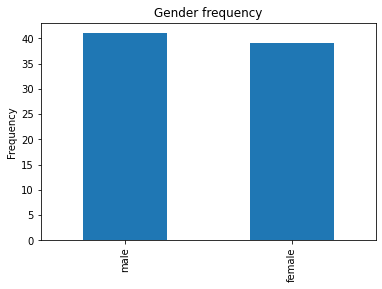

In [8]:
#Gender frequency 
meta_ind['sex'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Gender frequency')
plt.show()

In [10]:
#Total count of sexes
meta_ind.apply(set(['sex']), axis = 1).value_counts()

sex   
male      41
female    39
dtype: int64

In [31]:
#List of gender frequency 
meta_sex = meta.loc[:, ['host_id', 'sex']]
meta_id_sex = meta_sex.groupby(['host_id', 'sex']).count()
meta_id_sex

,
host_id,sex
2.1,male
2.2,male
3.1,male
3.2,male
4.1,female
...,...
46.2,male
47.1,male
47.2,male


**2.2 Zygosity**

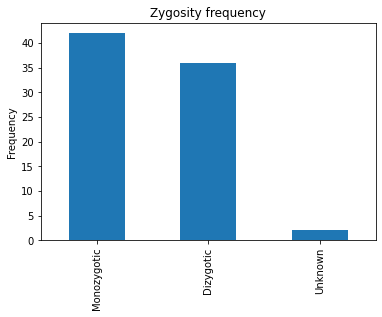

In [11]:
#Zygosity frequency 
meta_ind['zygosity'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Zygosity frequency')
plt.show()

In [12]:
#Total count of zygosity
meta_ind.apply(set(['zygosity']), axis = 1).value_counts()

zygosity   
Monozygotic    42
Dizygotic      36
Unknown         2
dtype: int64

In [37]:
#Real zygosity frequency 
meta_zyg = meta.loc[:, ['host_id', 'zygosity']]
meta_id_zyg = meta_zyg.groupby(['host_id', 'zygosity']).count()
meta_id_zyg

,
host_id,zygosity
2.1,Dizygotic
2.2,Dizygotic
3.1,Monozygotic
3.2,Monozygotic
4.1,Dizygotic
...,...
46.2,Dizygotic
47.1,Monozygotic
47.2,Monozygotic


**2.3 Delivery**

*2.3.1 Mode of delivery*

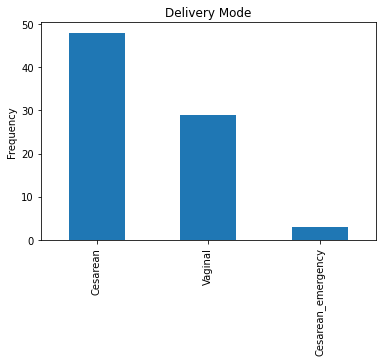

In [27]:
#Frequency of delivery mode 
meta_ind['delivery_mode'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Delivery Mode')
plt.show()

In [28]:
#Total count of different delivery modes
meta_ind.apply(set(['delivery_mode']), axis = 1).value_counts()

delivery_mode     
Cesarean              48
Vaginal               29
Cesarean_emergency     3
dtype: int64

*2.3.2 Term of delivery*

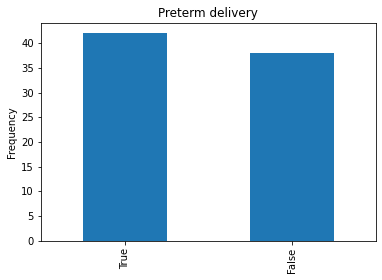

In [35]:
#Term of delivery 
meta_ind['delivery_preterm'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Preterm delivery')
plt.show()

In [4]:
#Total count of different delivery modes
meta_ind.apply(set(['delivery_preterm']), axis = 1).value_counts()

delivery_preterm
True                42
False               38
dtype: int64

**2.4 Race & Ethnicity**

*2.4.1 Race*

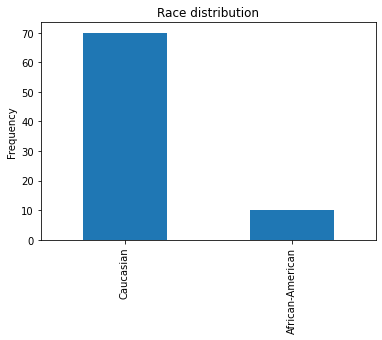

In [29]:
#Race distribution
meta_ind['race'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Race distribution')
plt.show()

In [30]:
#Total count of races
meta_ind.apply(set(['race']), axis = 1).value_counts()

race            
Caucasian           70
African-American    10
dtype: int64

*2.4.2 Ethnicity*

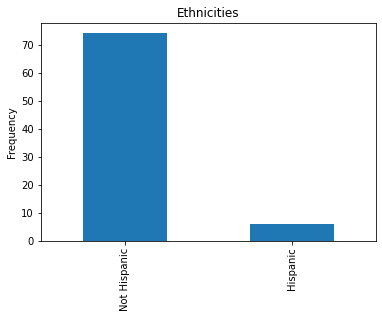

In [32]:
#Ethnicity distribution
meta_ind['ethnicity'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Ethnicities')
plt.show()

In [33]:
#Total count of hispanics
meta_ind.apply(set(['ethnicity']), axis = 1).value_counts()

ethnicity   
Not Hispanic    74
Hispanic         6
dtype: int64

**2.5 Birth weight & height**

*2.5.1 Birth weight*

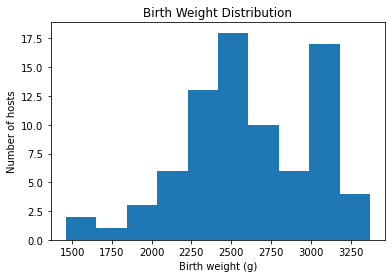

In [24]:
#Histogram of birth weights (g) of hosts 
meta_ind.hist(['birth_weight_g'], grid = False)
plt.ylabel('Number of hosts')
plt.xlabel('Birth weight (g)')
plt.title('Birth Weight Distribution')
plt.show()

*2.5.2 Birth length*

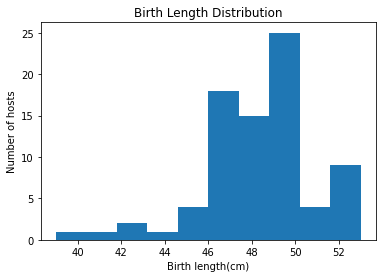

In [25]:
#Histogram of birth length (cm) of hosts
meta_ind.hist(['birth_length_cm'], grid = False)
plt.ylabel('Number of hosts')
plt.xlabel('Birth length(cm)')
plt.title('Birth Length Distribution')
plt.show()

### 3. Diet

**3.1 Weaning**

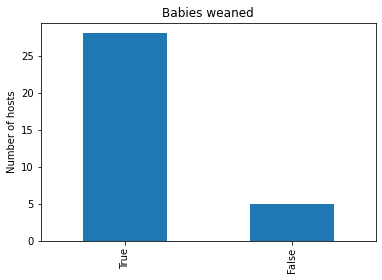

In [36]:
#Weaning
meta_ind['diet_weaning'].value_counts().plot(kind='bar')
plt.ylabel('Number of hosts')
plt.title('Babies weaned')
plt.show()

In [37]:
#Total count of Babies that have been weaned
meta_ind.apply(set(['diet_weaning']), axis = 1).value_counts()

diet_weaning
True            28
False            5
dtype: int64

Most of the Babies have already been weaned (introduced to solid foods) at one of the measurement points. *However, this plot does not say much because babies have been weaned at one of the sampling dates and not from the beginning*

**3.2 Types of milk diet**

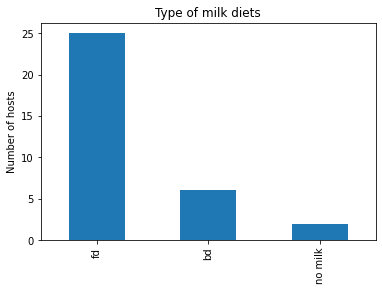

In [38]:
#Milk diet
meta_ind['diet_milk'].value_counts().plot(kind='bar')
plt.ylabel('Number of hosts')
plt.title('Type of milk diets')
plt.show()

In [39]:
#Total count of Babies for different diets
meta_ind.apply(set(['diet_milk']), axis = 1).value_counts()

diet_milk
fd           25
bd            6
no milk       2
dtype: int64

33 samples in total -> This means that also here the type of milk diet depends on the sampling point and changes over time

**3.3 Distribution of milk diets over host age**

Text(0, 0.5, 'age [months]')

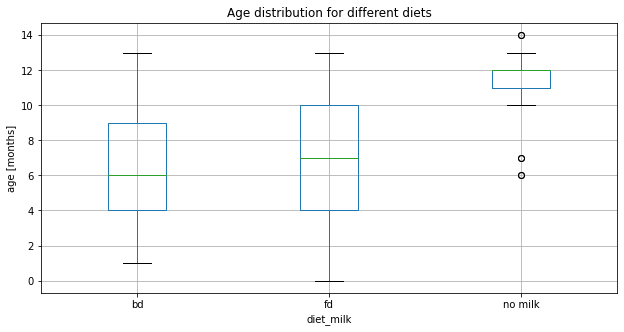

In [29]:
#Mean distribution for different diets 
meta.boxplot(column = 'age_months', by = 'diet_milk', figsize=(10,5));
plt.suptitle("")
plt.title("Age distribution for different diets")
plt.ylabel("age [months]")

In [3]:
meta_diet_age = meta[['diet_milk', 'age_months']].dropna()
meta_diet = meta_diet_age.groupby('diet_milk').groups
meta_diet

#Extract individual groups
bd = meta_diet["bd"]
fd = meta_diet["fd"]
no_milk = meta_diet["no milk"]

#Perform ANOVA
stats.f_oneway(bd, fd, no_milk)

F_onewayResult(statistic=4.624713837201709, pvalue=0.01009162134284619)

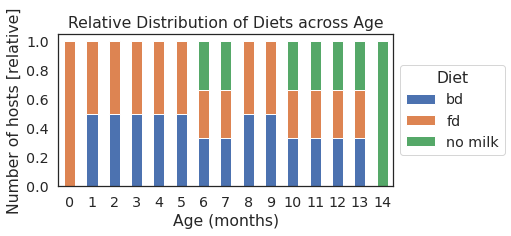

In [30]:
#Stacked Barplot of relative distribution of diet over age (months)
subset = meta[['age_months', 'diet_milk']].sort_values(by = ['age_months']) #order according to age
subset[['number']] = 1
countdf = subset.groupby(['age_months','diet_milk'])['number'].sum().reset_index()

# reshape the data sligthly before plotting
stacked = countdf.groupby(['age_months', 'diet_milk']) \
                .count() \
                .reset_index() \
                .pivot('age_months', 'diet_milk', 'number')
stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (6, 2.8), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.3):
    # matplotlib's bar plot
    ax = stacked_rel.plot(kind='bar', stacked=True)
    
    # matplotlib's customization
    ax.set_xlabel('Age (months)')
    ax.set_ylabel('Number of hosts [relative]')
    ax.set_title('Relative Distribution of Diets across Age')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend = ax.get_legend()
    legend.set_title('Diet')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace('.0', '') for l in xlabels]
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)
    

**3.4 Minimum host age for weaning**

In [6]:
#Create dataset with minimum weaning age for each host
meta_wean_T = meta[meta['diet_weaning']==True].copy()
meta_wean = meta_wean_T[['host_id', 'age_months']]
meta_wean_g = meta_wean.groupby(['host_id']).min()
meta_wean_g

,age_months
host_id,
2.1,4.0
2.2,5.0
3.1,5.0
3.2,4.0
4.1,6.0
...,...
46.2,4.0
47.1,1.0
47.2,1.0


In [17]:
#Descriptive statistics for minimum weaning age for each host
meta_wean_g.describe()

,age_months
count,80.000000
mean,4.887500
std,1.841805
min,0.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,9.000000


([<matplotlib.axis.XTick at 0x7f3a6a6e7250>], [Text(1, 0, '')])

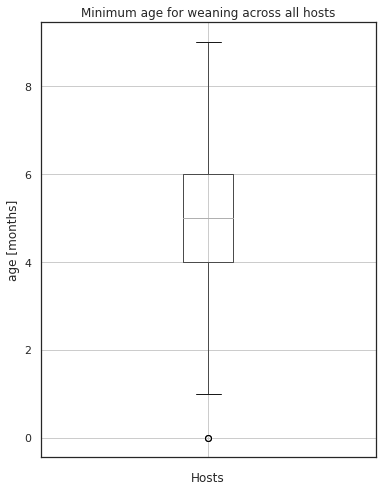

In [18]:
#Visualization
meta_wean_g.boxplot(column = 'age_months');
plt.suptitle("")
plt.title("Minimum age for weaning across all hosts")
plt.ylabel("age [months]")
plt.xlabel("Hosts")
plt.xticks([1], [''])

### 4. Distribution of measurements across the years

In [14]:
#How many samples from the year 2010?
Year_2010 = meta['collection_date'].str.contains('2010')
Year_1 = sum(Year_2010)
print(Year_1)

334


In [15]:
#How many samples are from the year 2011?
Year_2011 = meta['collection_date'].str.contains('2011')
Year_2 = sum(Year_2011)
print(Year_2)

766


In [16]:
#How many samples are from the year 2012?
Year_2012 = meta['collection_date'].str.contains('2012')
Year_3 = sum(Year_2012)
print(Year_3)

526


In [17]:
#How many samples are from the year 2013?
Year_2013 = meta['collection_date'].str.contains('2013')
Year_3 = sum(Year_2013)
print(Year_3)

43


In [18]:
#Subset meta according to different years
Year_2010 = meta.loc[meta['collection_date'].str.contains('2010'), :]
Year_2011 = meta.loc[meta['collection_date'].str.contains('2011'), :]
Year_2012 = meta.loc[meta['collection_date'].str.contains('2012'), :]
Year_2013 = meta.loc[meta['collection_date'].str.contains('2013'), :]

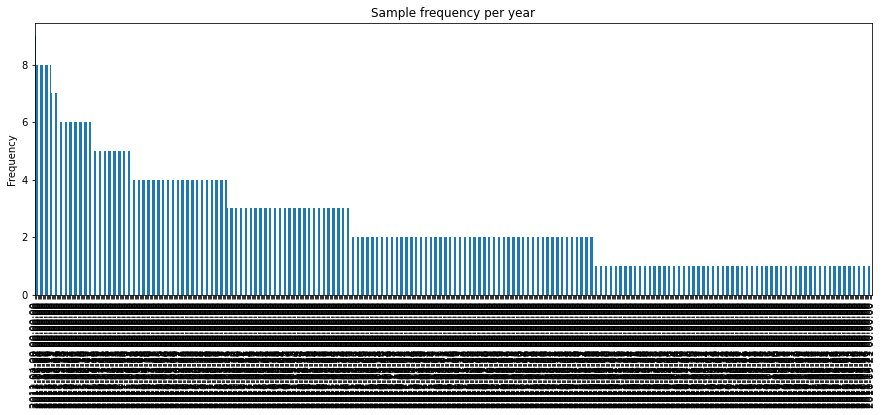

In [5]:
#plot the sample frequencies per year 
meta['collection_date'].value_counts().plot(kind='bar', figsize=(15,5))
plt.ylabel('Frequency')
plt.title('Sample frequency per year')
plt.show()
#How to make a histogram of the years?? - In progress (midterm)

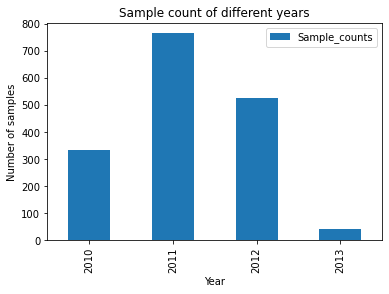

In [15]:
#Create a new DF only containing the counts of the samples for different years (to plot)
data_year = {'Year':['2010', '2011', '2012', '2013'],
        'Sample_counts':[334, 766, 526, 43]}
year = pd.DataFrame(data_year)
year

#Plot the new DF 
year.plot(kind='bar', y='Sample_counts', x='Year')
plt.ylabel('Number of samples')
plt.title('Sample count of different years')
plt.show()

Trials

### 5. Plots for the final report

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


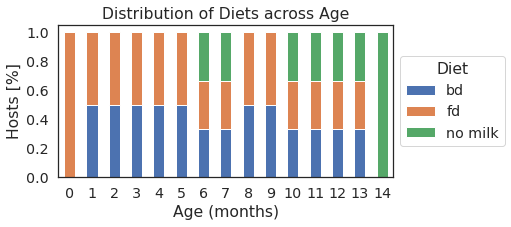

In [32]:
#Stacked Barplot of relative distribution of diet over age (months)
subset = meta[['age_months', 'diet_milk']].sort_values(by = ['age_months']) #order according to age
subset[['number']] = 1
countdf = subset.groupby(['age_months','diet_milk'])['number'].sum().reset_index()

# reshape the data sligthly before plotting
stacked = countdf.groupby(['age_months', 'diet_milk']) \
                .count() \
                .reset_index() \
                .pivot('age_months', 'diet_milk', 'number')
stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (6, 2.8), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.3):
    # matplotlib's bar plot
    ax = stacked_rel.plot(kind='bar', stacked=True)
    
    # matplotlib's customization
    ax.set_xlabel('Age (months)')
    ax.set_ylabel('Hosts [%]')
    ax.set_title('Distribution of Diets across Age')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend = ax.get_legend()
    legend.set_title('Diet')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace('.0', '') for l in xlabels]
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)
    
#Download 
plt.savefig("data/Diets_Age.eps", bbox_inches='tight')

/tmp/ipykernel_70/2285194472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2[['number']] = 1
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


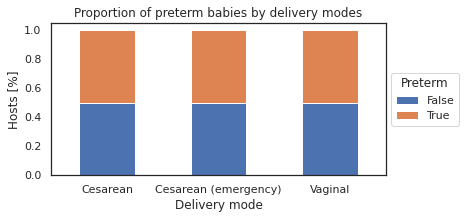

In [34]:
#Delivery mode 
subset2 = meta_ind[['delivery_mode', 'delivery_preterm']]
subset2[['number']] = 1
Delivery = subset2.groupby(['delivery_mode','delivery_preterm'])['number'].sum().reset_index()

# reshape the data sligthly before plotting
stacked = Delivery.groupby(['delivery_mode', 'delivery_preterm']) \
                .count() \
                .reset_index() \
                .pivot('delivery_mode', 'delivery_preterm', 'number')
stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (6, 2.8), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.0):
    # matplotlib's bar plot
    ax = stacked_rel.plot(kind='bar', stacked=True)
    
    # matplotlib's customization
    ax.set_xlabel('Delivery mode')
    ax.set_ylabel('Hosts [%]')
    ax.set_title('Proportion of preterm babies by delivery modes')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend = ax.get_legend()
    legend.set_title('Preterm')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace('Cesarean_emergency', 'Cesarean (emergency)') for l in xlabels]
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)
    
#Download 
plt.savefig("data/Preterm_DeliveryMode.eps", bbox_inches='tight')

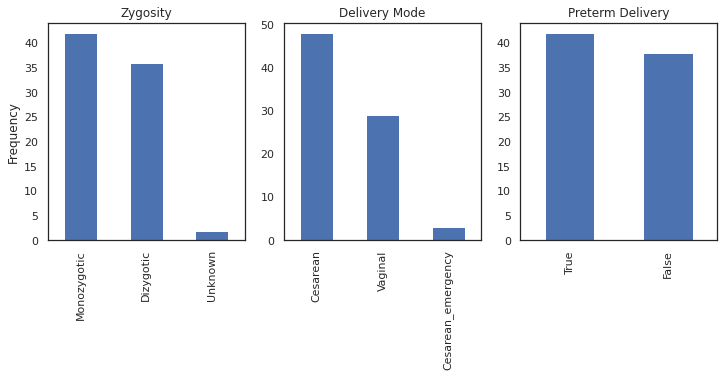

In [35]:
#3 simple plots about zygosity, delivery mode, preterm
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
meta_ind['zygosity'].value_counts().plot(kind='bar', ax = ax1)
meta_ind['delivery_mode'].value_counts().plot(kind='bar', ax = ax2)
meta_ind['delivery_preterm'].value_counts().plot(kind='bar', ax = ax3)

#Set titles of subplots
ax1.set_title('Zygosity')
ax2.set_title('Delivery Mode')
ax3.set_title('Preterm Delivery')

#Set axis labels 
ax1.set_ylabel('Frequency')


#Download 
plt.savefig("data/Zygosity_DeliveryMode_Preterm.eps", bbox_inches='tight')

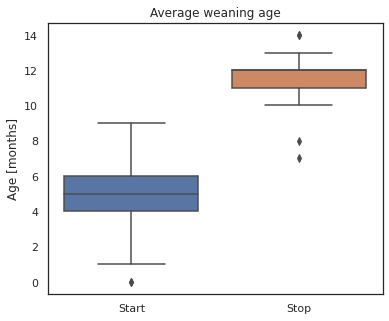

In [53]:
#Minimum Weaning age 
meta_wean_T = meta[meta['diet_weaning']==True].copy()
meta_wean = meta_wean_T[['host_id', 'age_months']]
meta_wean_min = meta_wean.groupby(['host_id']).min().assign(Location = 'Start')

#Maximum weaning age 
meta_wean_max = meta_wean.groupby(['host_id']).max().assign(Location = 'Stop')

#Reorganize the data
c_meta_wean = pd.concat([meta_wean_min, meta_wean_max])    
m_meta_wean = pd.melt(c_meta_wean, id_vars=['Location'])
m_meta_wean.head()

#plot
sns.set(rc={'figure.figsize': (6, 5), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.0):
    #Boxplot
    ax = sns.boxplot(x="Location", y="value", data=m_meta_wean)    
    
    # matplotlib's customization
    ax.set_xlabel('')
    ax.set_ylabel('Age [months]')
    ax.set_title('Average weaning age')

    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)



#Download
plt.savefig("data/Weaning.eps", bbox_inches='tight')

In [54]:
meta_wean_min.describe()

,age_months
count,80.000000
mean,4.887500
std,1.841805
min,0.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,9.000000


In [31]:
meta_wean_max.describe()

,age_months,Location
count,80.000000,80.0
mean,11.750000,2.0
std,1.012579,0.0
min,7.000000,2.0
25%,11.000000,2.0
50%,12.000000,2.0
75%,12.000000,2.0
max,14.000000,2.0
